<h1> Vehicles Sales Analysis </h1>

In [1]:
from pandas import *
from matplotlib.pyplot import *
import seaborn as sns 
import numpy as np

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2388018739.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import *


In [2]:
data_before_first_selection = read_csv("vehicles.csv")

In [3]:
set_option("display.max_columns",None)
data_before_first_selection.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,time
131411,7315483431,https://boise.craigslist.org/ctd/d/twin-falls-...,boise,https://boise.craigslist.org,35988,2015.0,gmc,yukon xl slt,good,NaN,108301.0,clean,other,1GKS2HKC8FR138466,NaN,NaN,hatchback,silver,https://images.craigslist.org/00C0C_bD3JKRhuNS...,Why Buy From Con Paulos Chevrolet?Here at Con ...,NaN,id,42.684990,-114.517427,5/1/2021,14:21:18
142251,7314684323,https://chicago.craigslist.org/chc/cto/d/bridg...,chicago,https://chicago.craigslist.org,12425,2014.0,chevrolet,impala ltz,good,6,85200.0,rebuilt,automatic,NaN,fwd,NaN,NaN,custom,https://images.craigslist.org/00r0r_dq83XCoJOo...,Used Chevy Impala LTZ 2014 For Sale -3.6 L/ V6...,NaN,il,41.743100,-87.806600,4/29/2021,23:51:39
146087,7314899805,https://springfieldil.craigslist.org/ctd/d/spr...,springfield,https://springfieldil.craigslist.org,6695,2009.0,subaru,forester 2.5 x,NaN,NaN,128903.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_7QjK6WnWlV...,Auto Mall of Springfield presents you with thi...,NaN,il,39.762200,-89.627500,4/30/2021,12:34:37
51999,7316530292,https://sacramento.craigslist.org/cto/d/west-s...,sacramento,https://sacramento.craigslist.org,45000,2018.0,ram,2500,like new,6,11000.0,salvage,automatic,3C6UR5DL9JG406646,4wd,full-size,truck,white,https://images.craigslist.org/00u0u_k55mMdlcYC...,2018 Ram 2500 Cummins Big Horn Edition. 11000 ...,NaN,ca,38.592700,-121.532500,5/3/2021,17:36:47
387368,7313039039,https://vermont.craigslist.org/ctd/d/winnisqua...,vermont,https://vermont.craigslist.org,15995,2017.0,subaru,forester,excellent,4,100762.0,clean,automatic,JF2SJAEC5HH543793,4wd,NaN,SUV,black,https://images.craigslist.org/00i0i_7cQBwQP44E...,"Only $15,995! Very clean Subaru Forester Pre...",NaN,vt,43.512453,-71.495697,4/26/2021,17:16:48


<h3> Data Cleaning </h3>

In [4]:
data = data_before_first_selection.drop(["id","url","region_url","image_url","description","county","VIN"], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426853 entries, 0 to 426852
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426853 non-null  object 
 1   price         426853 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426853 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
 17  posting_date  426812 non-null  object 
 18  time

In [6]:
def nullvalues(data):
    return DataFrame({col: data[col].isnull().sum() for col in data.columns}, index=["null values"]).T
print(data.shape)
nullvalues(data)

(426853, 19)


,null values
region,0
price,0
year,1178
manufacturer,17619
model,5250
condition,174077
cylinders,177651
odometer,4373
title_status,8215
transmission,2529


In [7]:
set_option("display.max_columns",None)
data.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,time
89605,"washington, DC",3995,2006.0,hyundai,tucson,NaN,NaN,171681.0,clean,automatic,fwd,NaN,SUV,blue,dc,39.105930,-77.56718,4/30/2021,14:43:32
293819,cleveland,8900,2016.0,nissan,altima 2.5 sr,excellent,4,76000.0,rebuilt,automatic,fwd,full-size,sedan,black,oh,41.323200,-81.74570,4/17/2021,12:34:58
256862,south jersey,10950,2010.0,honda,odyssey ex-l,good,6,73900.0,clean,automatic,fwd,NaN,mini-van,silver,nj,40.064200,-74.68990,4/28/2021,14:41:26
331298,lehigh valley,13500,2011.0,honda,odyssey exl,excellent,6,74500.0,clean,automatic,fwd,full-size,mini-van,red,pa,40.601800,-75.52250,4/28/2021,21:47:50
212996,fargo / moorhead,11000,2016.0,toyota,corolla,NaN,4,104440.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.590185,-95.57469,4/6/2021,16:31:54


In [8]:
data["price"].astype(int)
data["cylinders"] = to_numeric(data["cylinders"],errors="coerce")
data = data[(data['price'] > 0) | (data['cylinders'] > 0)]

In [9]:
def uniquevalues(data):
    return DataFrame({col: data[col].nunique() for col in data.columns}, index=["unique values"]).T
print(data.shape)
uniquevalues(data)

(409375, 19)


,unique values
region,404
price,15655
year,113
manufacturer,42
model,28953
condition,6
cylinders,6
odometer,101508
title_status,6
transmission,3


In [10]:
data.duplicated().sum()

28

In [11]:
data.drop_duplicates(inplace=True)

<h3>handing missing values</h3>

In [12]:
# for missing in year
year_mean = data["year"].mean()
print("year mean is : ",year_mean)
year_median = data["year"].median()
print("year median is : ",year_median)
year_mode = data["year"].mode()[0]
print("mode year : ", year_mode)


year mean is :  2011.1089876134292
year median is :  2013.0
mode year :  2017.0


we have to choose between 2011 ,2013 and mode year


In [13]:
data["year"] = data["year"].fillna(year_mode)

In [14]:
# foe missing in manufacturer
print(data["manufacturer"].value_counts()[0:10])

manufacturer
ford         67834
chevrolet    52997
toyota       32825
honda        20383
jeep         18237
nissan       18005
ram          17562
gmc          16328
bmw          14256
dodge        12969
Name: count, dtype: int64


we cant replace the null values with mode but it would be much safer to fill it with unknown

In [15]:
data["manufacturer"] = data["manufacturer"].fillna("unknown")

In [16]:
# for missing in model
print(data["model"].value_counts()[0:10])

model
f-150             7658
silverado 1500    4998
1500              4035
camry             2945
silverado         2808
accord            2808
wrangler          2752
civic             2645
2500              2624
escape            2615
Name: count, dtype: int64


In [17]:
data["model"] = data["model"].fillna("unknown")

In [18]:
# for missing in car condition
print(data["condition"].value_counts()[0:10])

condition
good         120349
excellent     99285
like new      21012
fair           6758
new            1250
salvage         599
Name: count, dtype: int64


it is reasonable to replace the missing condition with good condition 

In [19]:
data["condition"] = data["condition"].fillna("good")

In [20]:
# and for cylinders so
cylinder_mean = data["cylinders"].mean()
print("cylinder mean is : ",cylinder_mean)
cylinder_median = data["cylinders"].median()
print("cylinder median is : ",cylinder_median)
cylinder_mode = data["cylinders"].mode()[0]
print("mode cylinder : ", cylinder_mode)


cylinder mean is :  5.906639665334081
cylinder median is :  6.0
mode cylinder :  6.0


In [21]:
data["cylinders"].fillna(6,inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2982280954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["cylinders"].fillna(6,inplace= True)


In [22]:
# for missing values on odometer
odometer_mean = data["odometer"].mean()
print("odometer mean is : ", odometer_mean)
odometer_median = data["odometer"].median()
print("odometer median is : ",odometer_median)
odometer_mode = data["odometer"].mode()[0]
print("mode odometer : ", odometer_mode)


odometer mean is :  98736.1906797167
odometer median is :  86734.0
mode odometer :  100000.0


In [23]:
data["odometer"].fillna(odometer_mode,inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\1962176522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["odometer"].fillna(odometer_mode,inplace= True)


In [24]:
# title status missing handling 
print(data["title_status"].value_counts()[0:10])

title_status
clean         388166
rebuilt         7201
salvage         3853
lien            1422
missing          801
parts only       191
Name: count, dtype: int64


In [25]:
data["title_status"].fillna("clean",inplace= True)
data["title_status"].replace({"missing":"clean"},inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\960542563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["title_status"].fillna("clean",inplace= True)


In [26]:
# transmission missing handling 
print(data["transmission"].value_counts()[0:10])

transmission
automatic    321414
other         61639
manual        24485
Name: count, dtype: int64


In [27]:
data["transmission"].fillna("automatic",inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\1726895044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["transmission"].fillna("automatic",inplace= True)


In [28]:
# drive missing handling 
print(data["drive"].value_counts()[0:10])

drive
4wd    128548
fwd    101707
rwd     58017
Name: count, dtype: int64


as the values of missing data is too large so we will replace it with random values but with propapility

In [29]:
def fill_missing_with_random_with_prob(data, value , prop ,column):
    missing_indices = data[column].isna()
    random_values = np.random.choice(value, size=missing_indices.sum(), p=prop)
    data.loc[missing_indices , column] = random_values
    return data


In [30]:
drive_values = ["4wd", "fwd", "rwd"]
drive_prop = list(
   ( data["drive"].value_counts()[0:10] ) / ( data.shape[0] - data["drive"].isnull().sum() )
)

data = fill_missing_with_random_with_prob(data,drive_values,drive_prop,"drive")

In [31]:
# so for missing in size column 
print(data["size"].value_counts()[0:10])

size
full-size      61483
mid-size       34452
compact        18786
sub-compact     3053
Name: count, dtype: int64


as the values of missing data is too large so we will replace it with random values but with propapility

In [32]:
size_values = ["full-size", "mid-size", "compact", "sub-compact"]
size_prop = list(
   ( data["size"].value_counts()[0:10] ) / ( data.shape[0] - data["size"].isnull().sum() )
)
data = fill_missing_with_random_with_prob(data,size_values,size_prop,"size")


In [33]:
# dealin with missing data in type column
print(data["type"].value_counts()[0:20])

type
sedan          83589
SUV            74602
pickup         42200
truck          34278
other          20212
coupe          18832
hatchback      16136
wagon          10312
van             8333
convertible     7610
mini-van        4716
offroad          607
bus              516
Name: count, dtype: int64


as also as it is critical value and too large data set so  

In [34]:
type_values = ['sedan','SUV','pickup','truck','other','coupe','hatchback','wagon','van','convertible','mini-van','offroad','bus']
type_prop = list(
   ( data["type"].value_counts()[0:20] ) / ( data.shape[0] - data["type"].isnull().sum() )
)
data = fill_missing_with_random_with_prob(data,type_values,type_prop,"type")


In [35]:
print(data["paint_color"].value_counts()[0:20])

paint_color
white     76018
black     60685
silver    41542
blue      30306
red       29686
grey      23847
green      7247
custom     6621
brown      6420
yellow     2106
orange     1913
purple      680
Name: count, dtype: int64


<p>as it is so important feature and has too many missing values so we have to replace it and due to the low standard diviation of it </p>
we will replace the missing values randomly with different probabilities

In [36]:
paint_color_values = ['white','black','silver','blue','red','grey','green','custom','brown','yellow','orange','purple']
paint_color_prop = list(
   ( data["paint_color"].value_counts()[0:20] ) / ( data.shape[0] - data["paint_color"].isnull().sum() )
)
data = fill_missing_with_random_with_prob(data,paint_color_values,paint_color_prop,"paint_color")

In [37]:
# for missing data in latitude and longitude
lat_mean = data["lat"].mean()
print("lat mean is : ",lat_mean)
lat_median = data["lat"].median()
print("lat median is : ",lat_median)
lat_mode = data["lat"].mode()[0]
print("mode lat : ", lat_mode)

long_mean = data["long"].mean()
print("long mean is : ",long_mean)
long_median = data["long"].median()
print("long median is : ",long_median)
long_mode = data["long"].mode()[0]
print("mode long : ", long_mode)

lat mean is :  38.529986791896256
lat median is :  39.2547
mode lat :  33.779214
long mean is :  -94.67173686049614
long median is :  -88.29475
mode long :  -84.411811


In [38]:
data["lat"] = data["lat"].fillna(lat_mean)
data["long"] = data["long"].fillna(long_median)

In [39]:
# missing data in data and time column
data["posting_date"] = to_datetime(data["posting_date"])

In [40]:
data["posting_date"].isnull().sum()

38

In [41]:
print(data["posting_date"].value_counts()[0:30])

posting_date
2021-05-03    34234
2021-05-04    29076
2021-04-30    26724
2021-05-01    24900
2021-04-29    20329
2021-04-28    18605
2021-04-23    18150
2021-04-27    17271
2021-05-02    17143
2021-04-26    15492
2021-04-22    14137
2021-04-24    13510
2021-04-21    12370
2021-04-16    10796
2021-04-20    10642
2021-04-19    10430
2021-04-15     9950
2021-04-14     9880
2021-04-17     9821
2021-04-09     8944
2021-04-08     8633
2021-04-12     8438
2021-04-25     8217
2021-04-13     8144
2021-04-07     7459
2021-04-05     7356
2021-04-10     7068
2021-04-06     6669
2021-04-18     6087
2021-04-11     5029
Name: count, dtype: int64


In [42]:
data["posting_date"] = data["posting_date"].fillna("2021-05-03")

In [43]:
print(data["time"].value_counts()[0:10])

time
10:01:13    69
10:11:05    67
10:31:02    64
10:31:17    64
10:31:14    61
11:01:11    61
10:31:09    61
12:01:09    60
10:31:22    60
11:30:58    58
Name: count, dtype: int64


In [44]:
data["time"] = data["time"].fillna("10:00:00")

In [45]:
nullvalues(data)

,null values
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
odometer,0
title_status,0
transmission,0


<h2> Dealing With Outliers</h2>

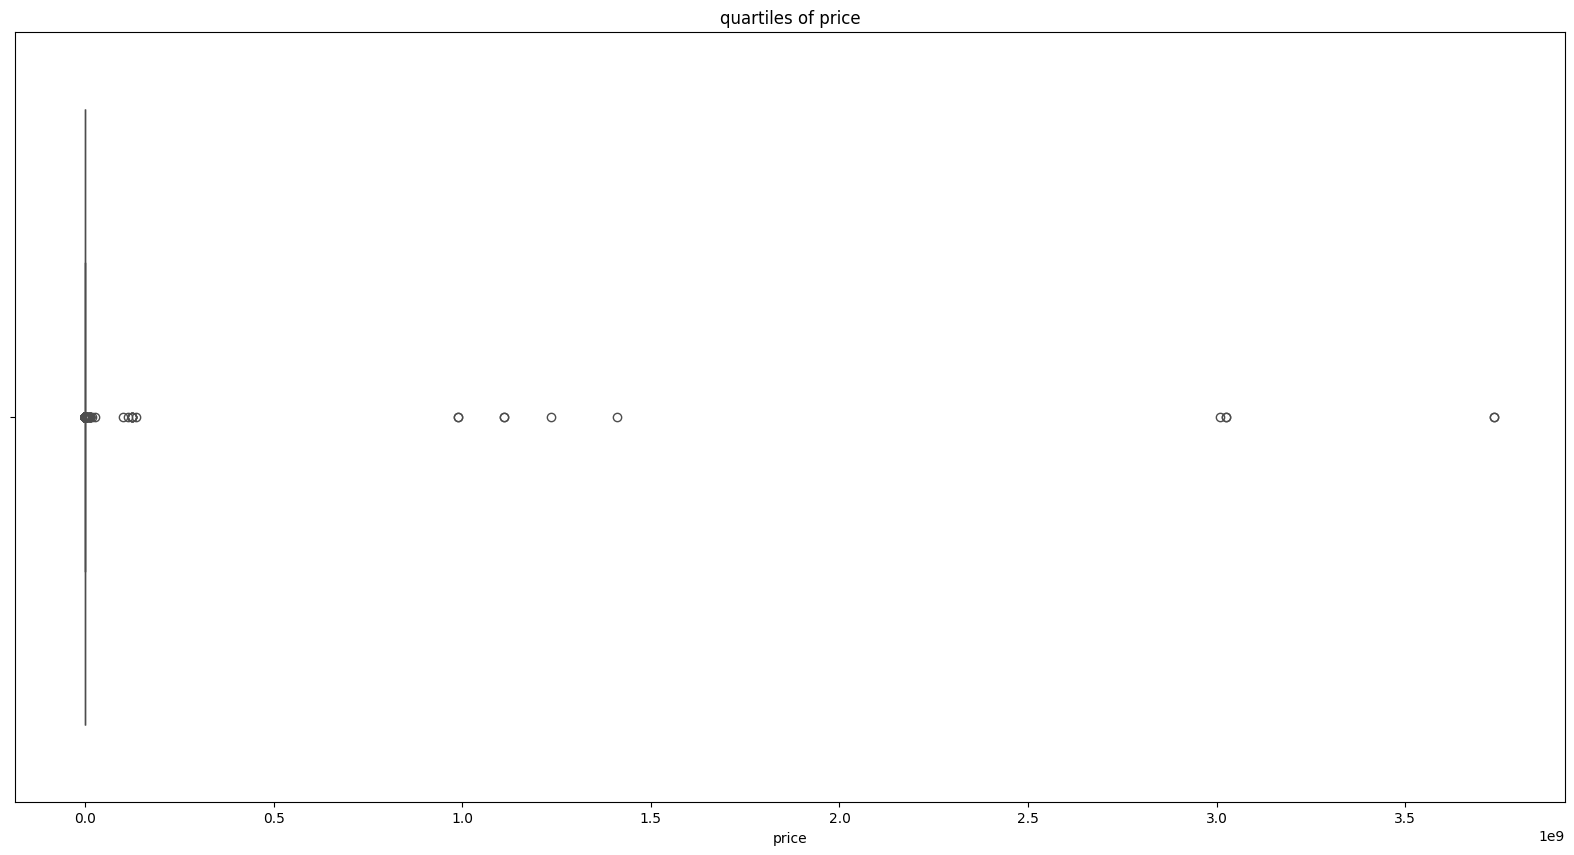

In [46]:
figure(figsize=(20,10))
sns.boxplot(x=data["price"],color="red")
title("quartiles of price")
show()

In [47]:
q1 = np.percentile(data["price"], 25)
q3 = np.percentile(data["price"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [48]:
data = data[(data["price"] > lower_bound) & (data["price"] < upper_bound)]

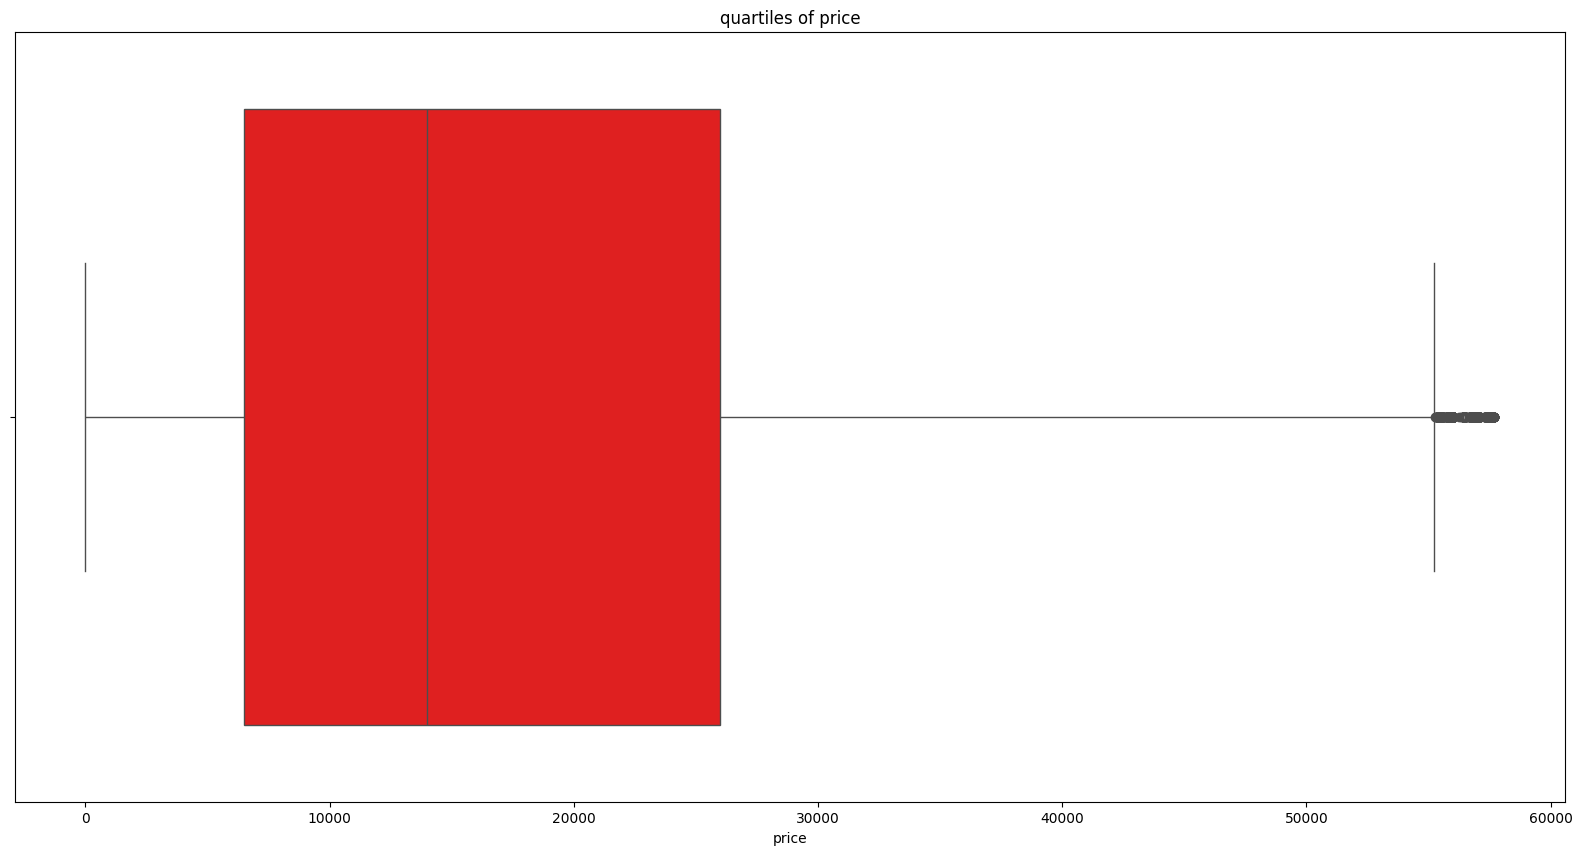

In [49]:
figure(figsize=(20,10))
sns.boxplot(x=data["price"],color="red")
title("quartiles of price")
show()

In [50]:
data.shape

(401252, 19)

<h2>date time series visual.</h2>

In [51]:
datetimesires = DataFrame({
    "price" : data["price"],
    "date"  : data["posting_date"],
    "time"  : data["time"]
})

In [52]:
datetimesires['date'] = to_datetime(datetimesires['date'])
datetimesires['time'] = to_datetime(datetimesires['time']).dt.time

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\1721389457.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetimesires['time'] = to_datetime(datetimesires['time']).dt.time


In [53]:
datetimesires.sort_values( by='date',ascending=True, inplace=True)

In [54]:
datetimesires.tail(20)

,price,date,time
154163,5995,2021-05-04,14:14:21
154164,30590,2021-05-04,12:41:22
63483,27999,2021-05-04,13:28:10
154165,39590,2021-05-04,12:41:19
154167,15000,2021-05-04,10:51:12
154168,14995,2021-05-04,10:34:10
154169,21995,2021-05-04,10:34:03
154170,4000,2021-05-04,10:13:51
32701,27000,2021-05-04,13:05:07
108079,7900,2021-05-04,08:00:37


C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2328926940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datetimesires["date"],y=datetimesires["price"],palette="pastel",estimator=sum)


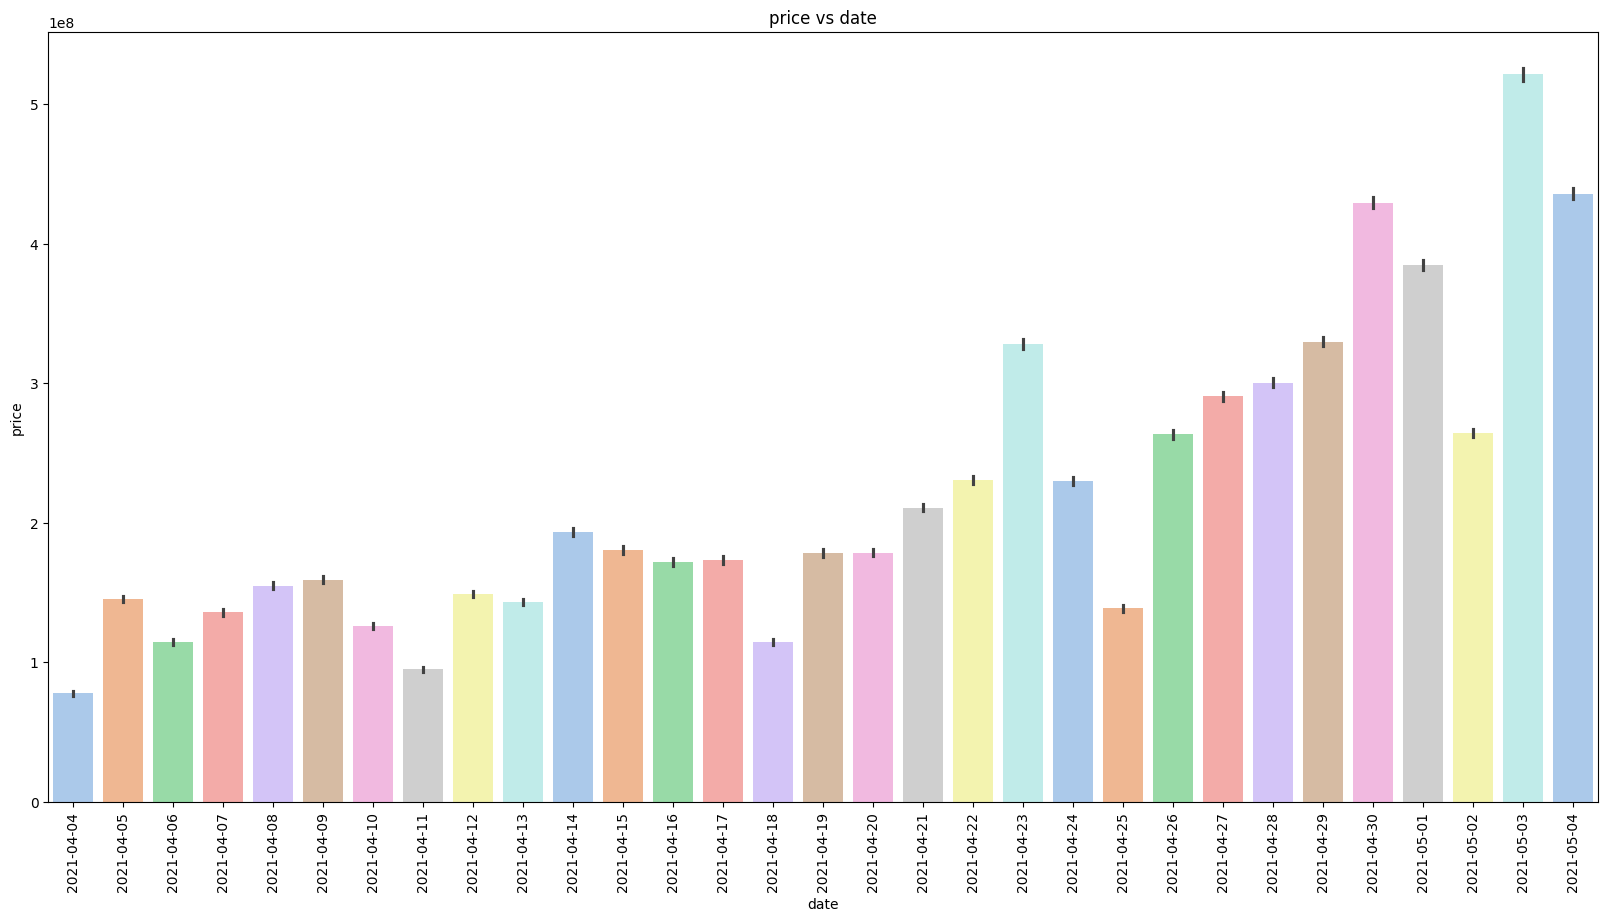

In [55]:
figure(figsize=(20,10))
sns.barplot(x=datetimesires["date"],y=datetimesires["price"],palette="pastel",estimator=sum)
title("price vs date")
xticks(rotation=90)
show()


<h2> Location Density </h2>

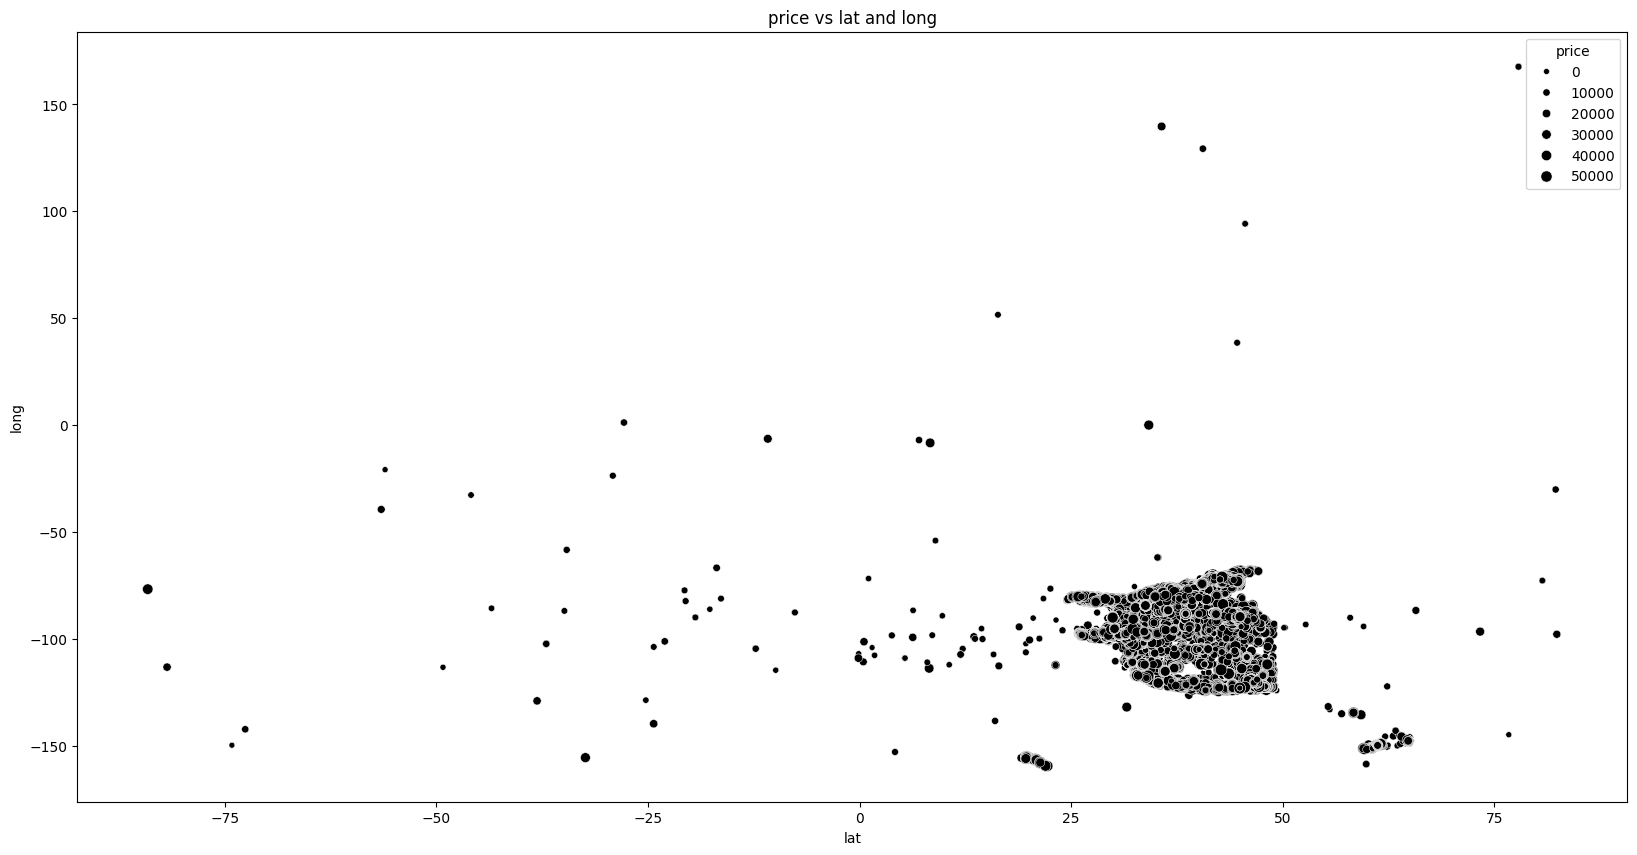

In [56]:
figure(figsize=(20,10))
sns.scatterplot(x=data["lat"],y=data["long"],color="black",size=data["price"])
title("price vs lat and long")
show()

<h2>Data Visualization</h2>

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2816694326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["manufacturer"],y=data["price"],palette="bright",estimator=sum)


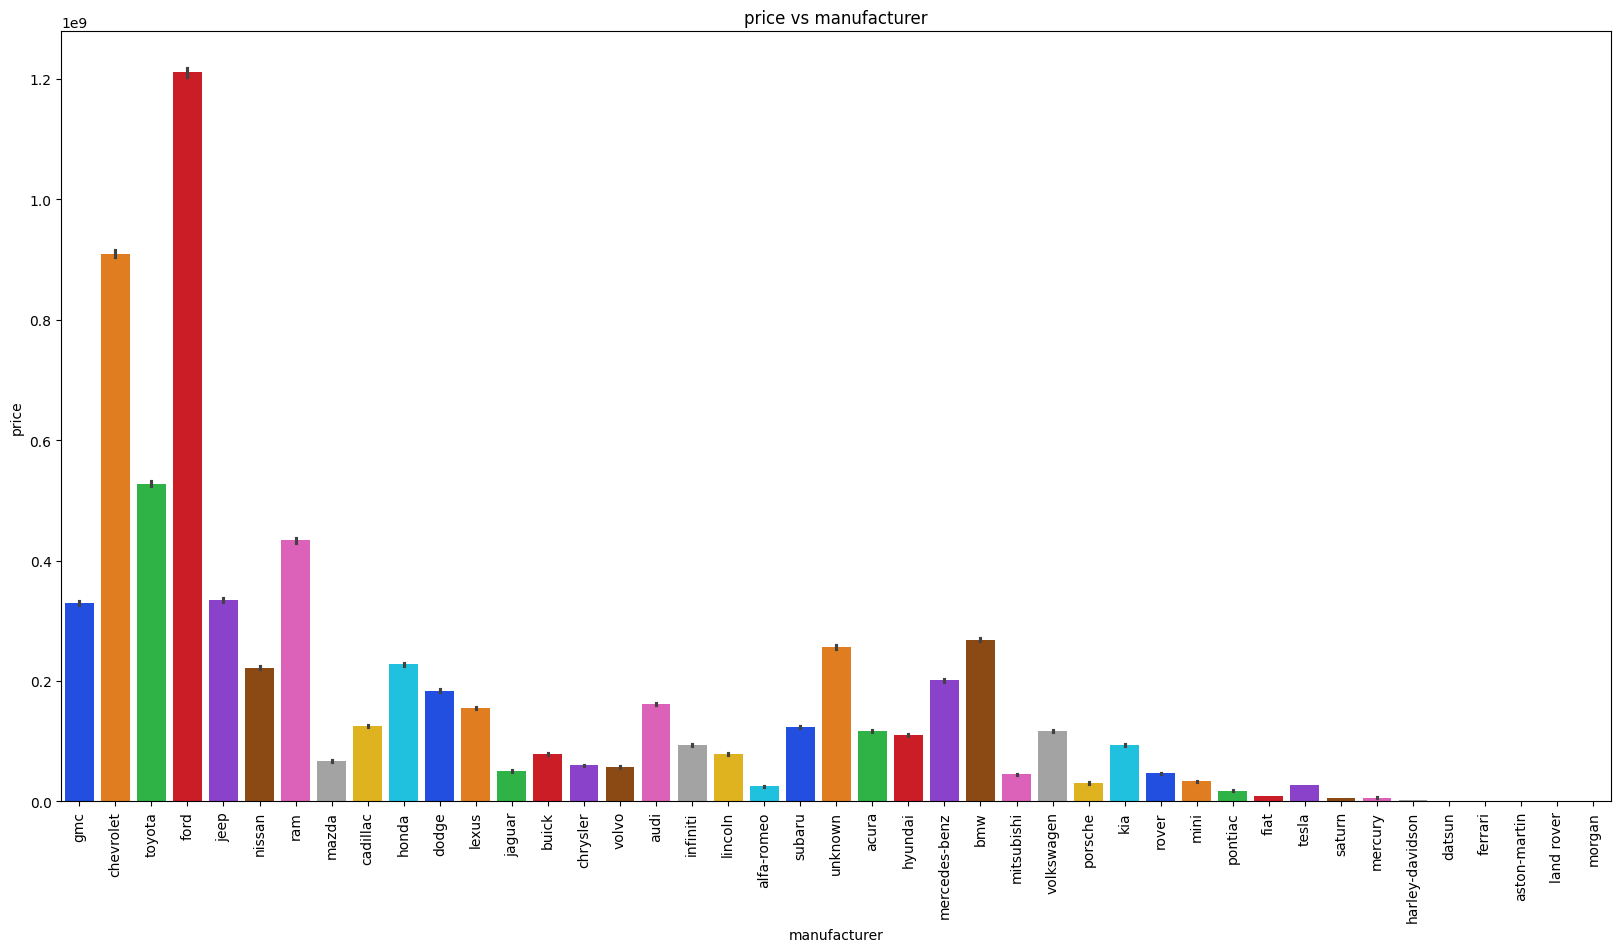

In [57]:
figure(figsize=(20,10))
sns.barplot(x=data["manufacturer"],y=data["price"],palette="bright",estimator=sum)
title("price vs manufacturer")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\1928209089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["condition"],y=data["price"],palette="pastel",estimator=sum)


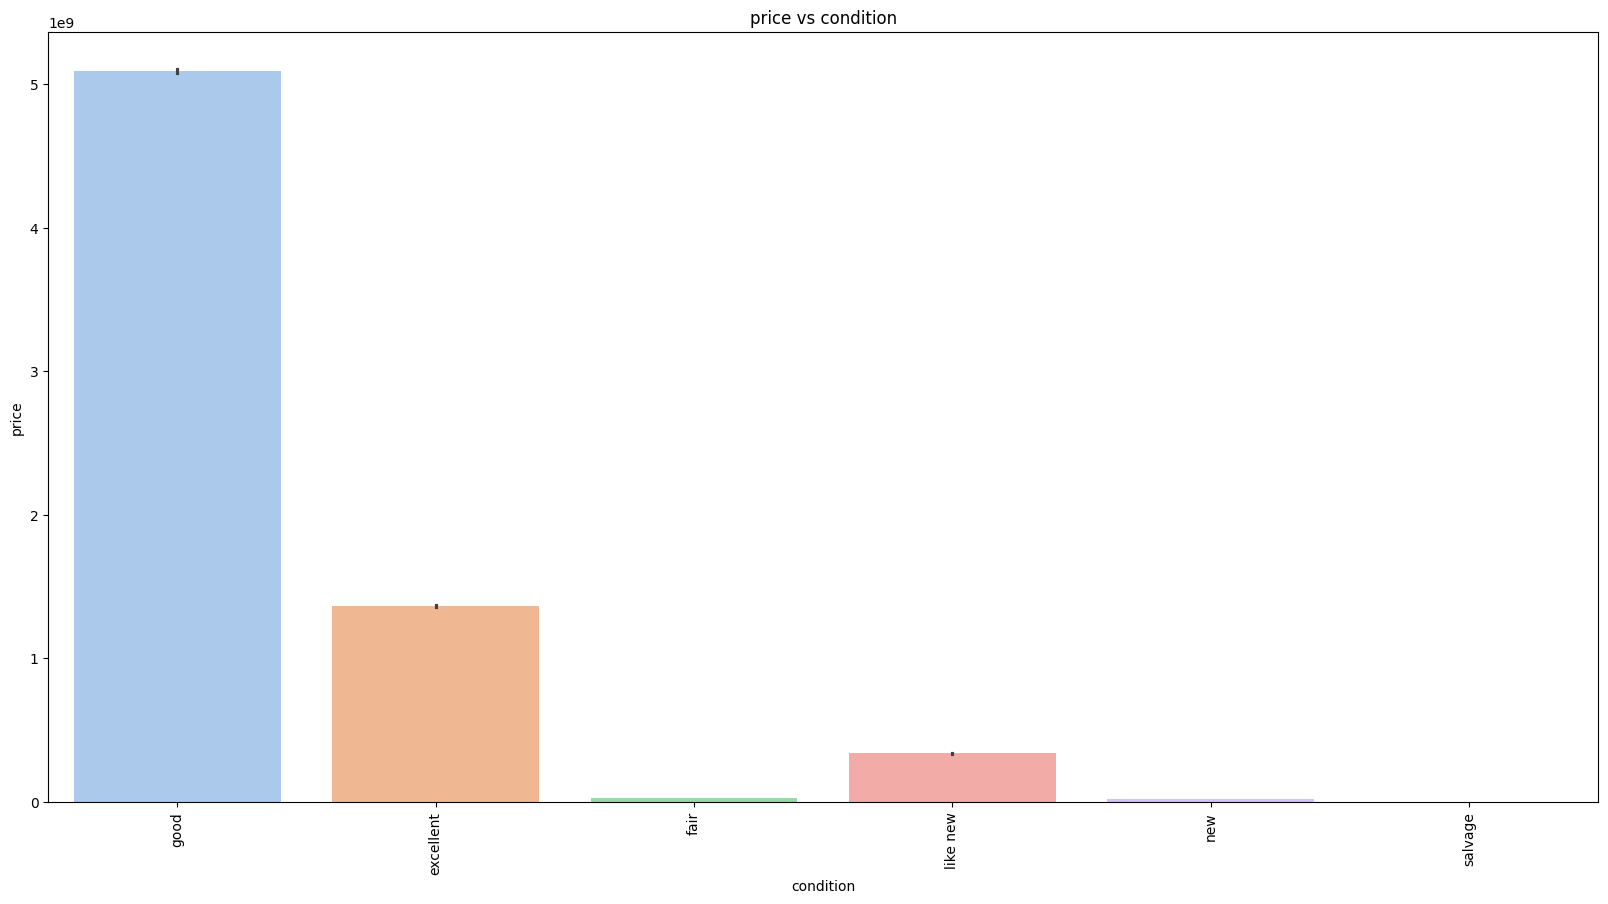

In [58]:
figure(figsize=(20,10))
sns.barplot(x=data["condition"],y=data["price"],palette="pastel",estimator=sum)
title("price vs condition")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\365731684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["title_status"],y=data["price"],palette="dark",estimator=sum)


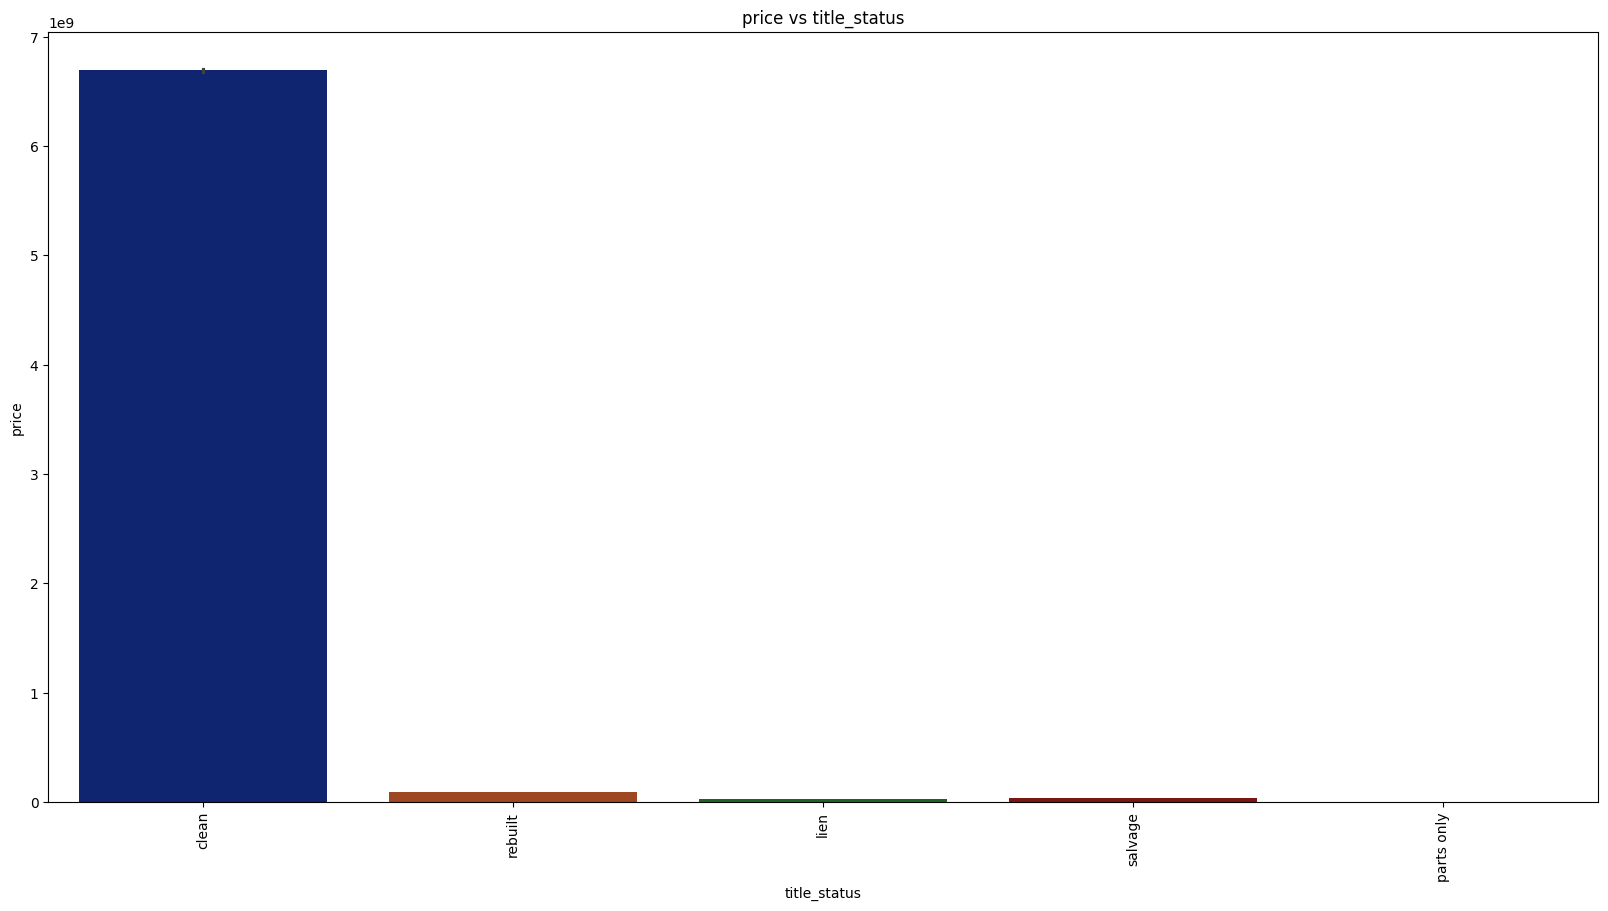

In [59]:
figure(figsize=(20,10))
sns.barplot(x=data["title_status"],y=data["price"],palette="dark",estimator=sum)
title("price vs title_status")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\244459357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["cylinders"],y=data["price"],palette="bright",estimator=sum)


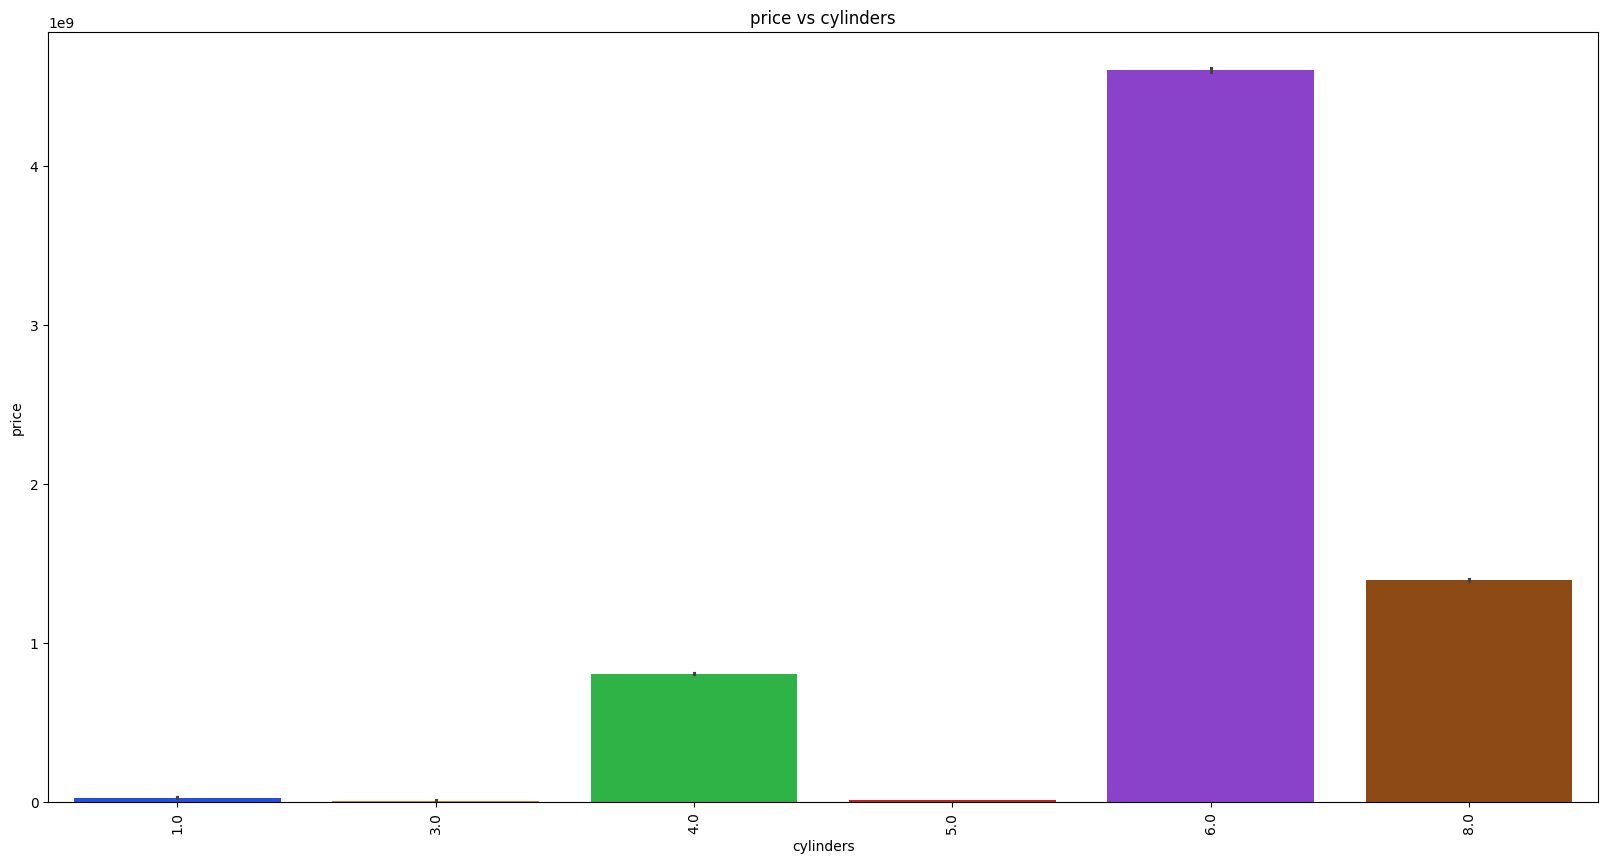

In [60]:
figure(figsize=(20,10))
sns.barplot(x=data["cylinders"],y=data["price"],palette="bright",estimator=sum)
title("price vs cylinders")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\3576197623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["year"],y=data["price"],palette="dark",estimator=sum)


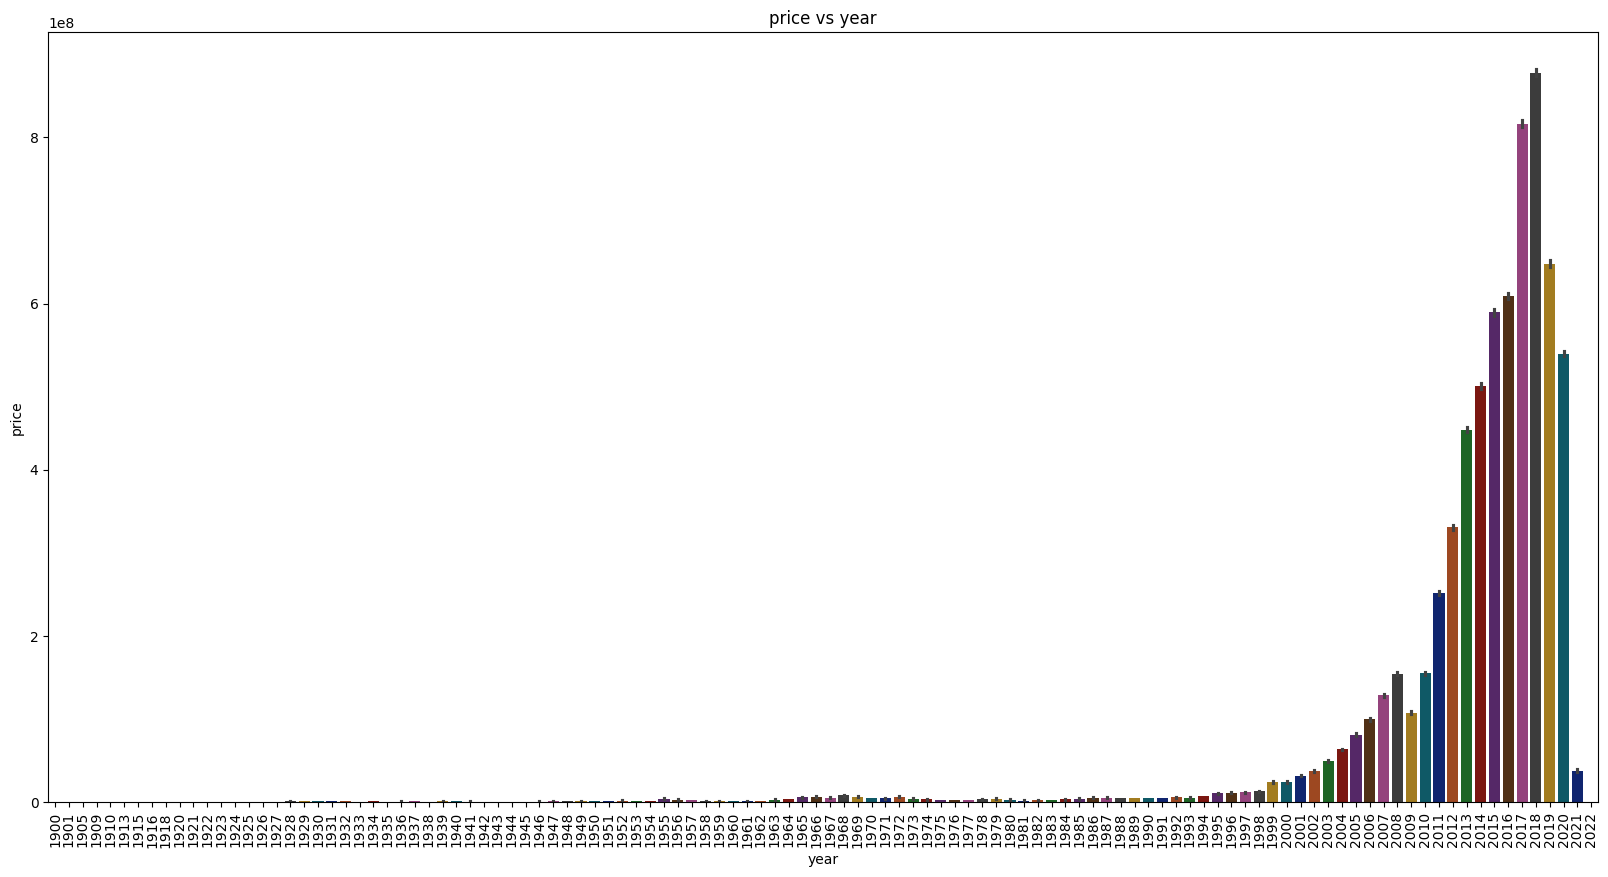

In [61]:
data["year"] = data["year"].astype(int)
figure(figsize=(20,10))
sns.barplot(x=data["year"],y=data["price"],palette="dark",estimator=sum)
title("price vs year")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2006250202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["drive"],y=data["price"],palette="bright",estimator=sum)


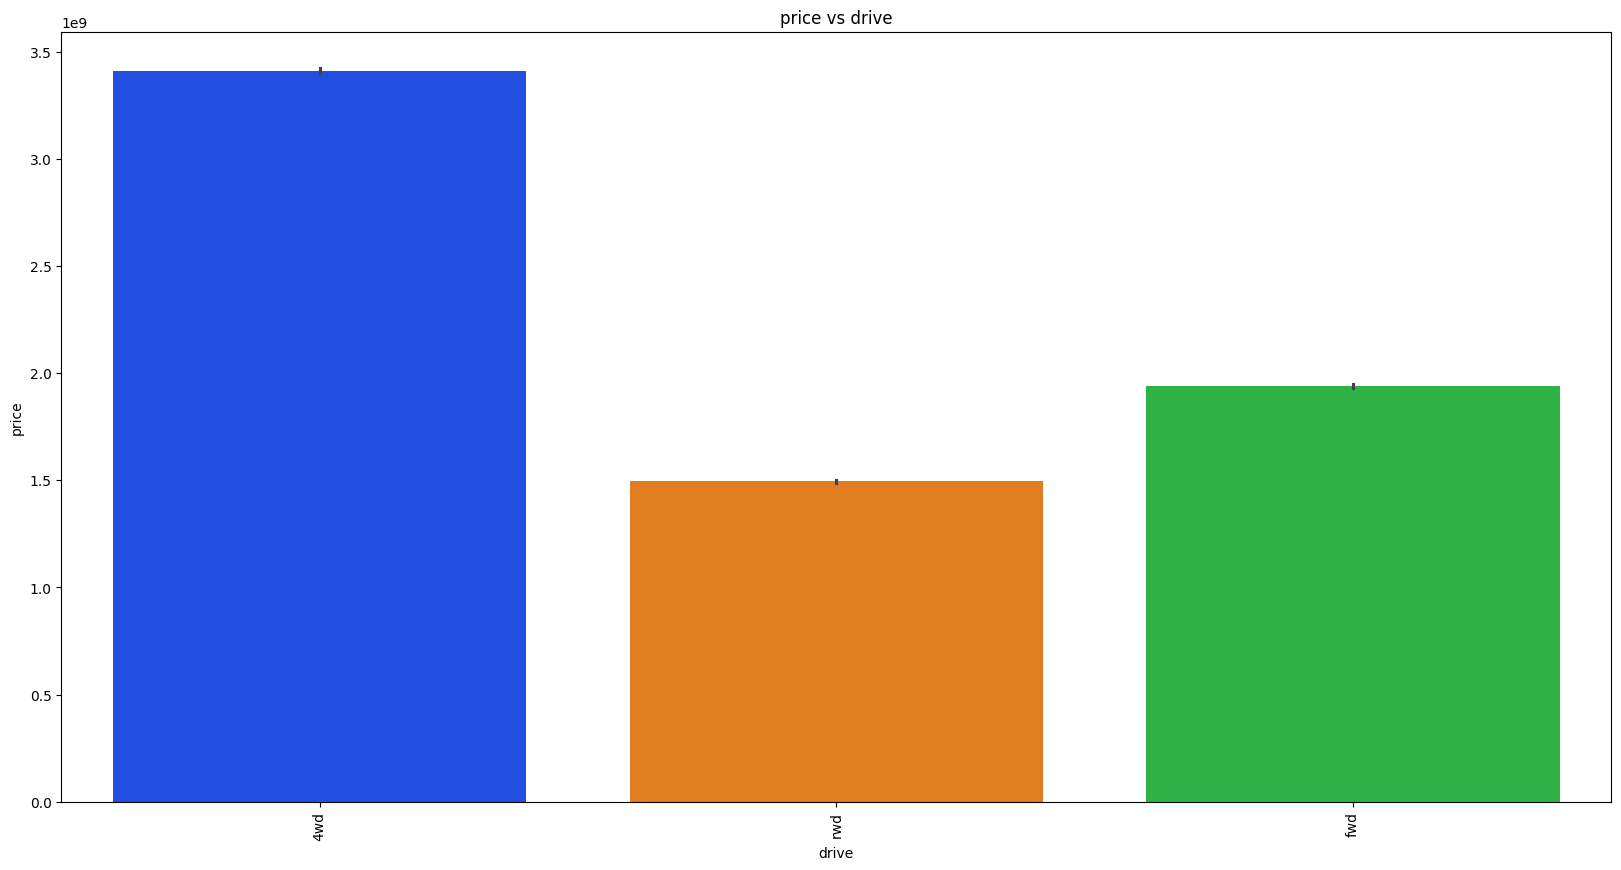

In [62]:
figure(figsize=(20,10))
sns.barplot(x=data["drive"],y=data["price"],palette="bright",estimator=sum)
title("price vs drive")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2294699806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["type"],y=data["price"],palette="pastel",estimator=sum)


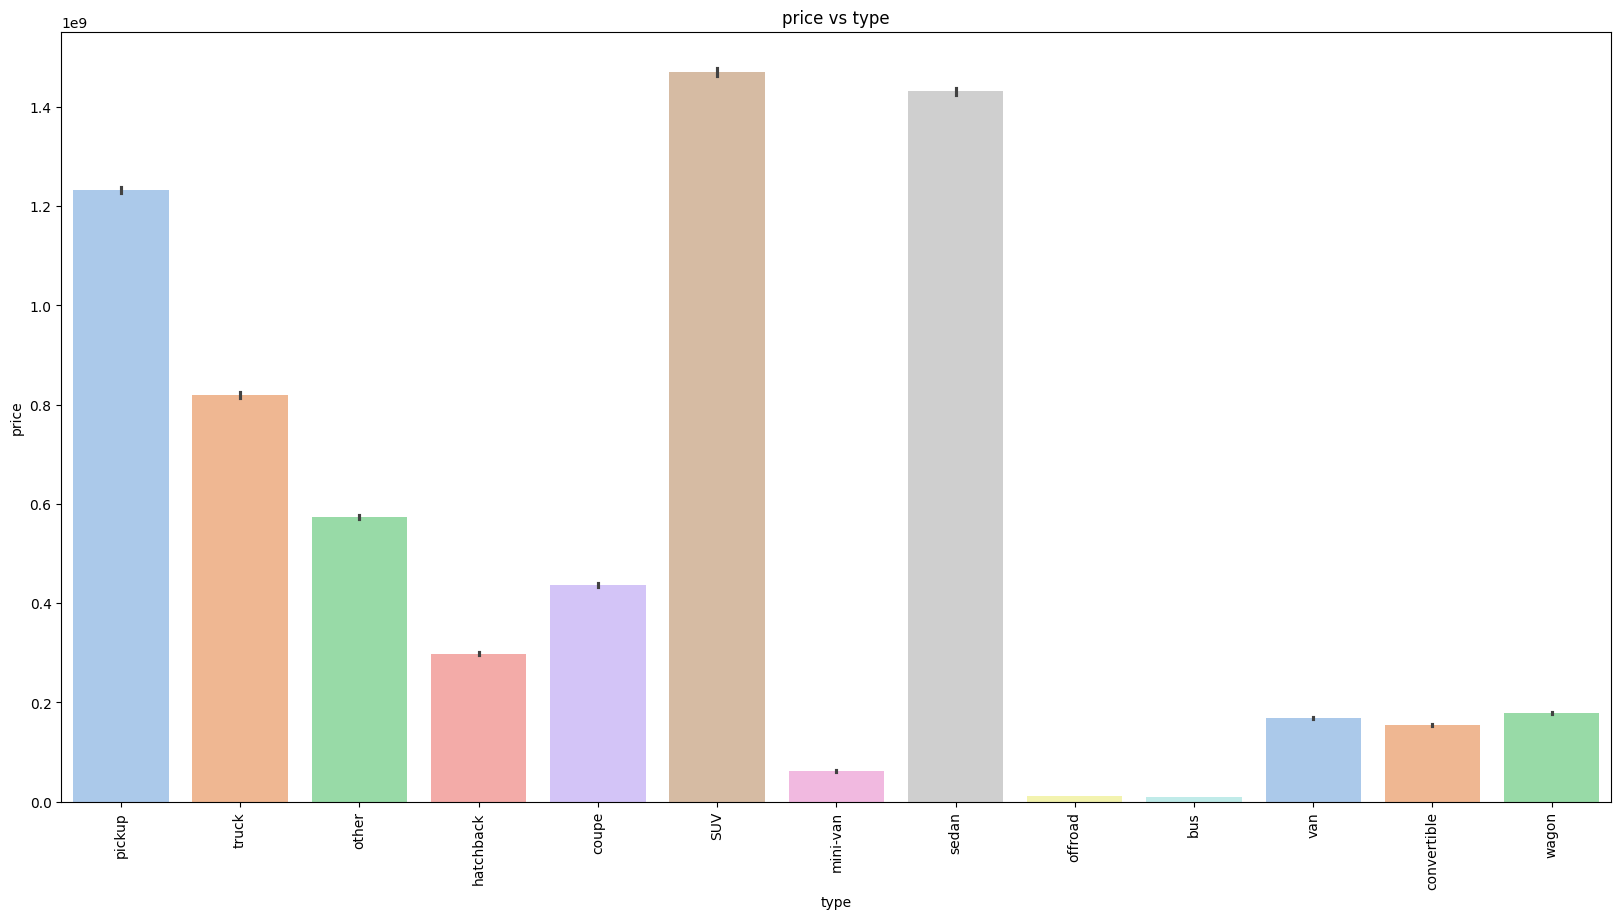

In [63]:
figure(figsize=(20,10))
sns.barplot(x=data["type"],y=data["price"],palette="pastel",estimator=sum)
title("price vs type")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2083829889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["transmission"],y=data["price"],palette="dark",estimator=sum)


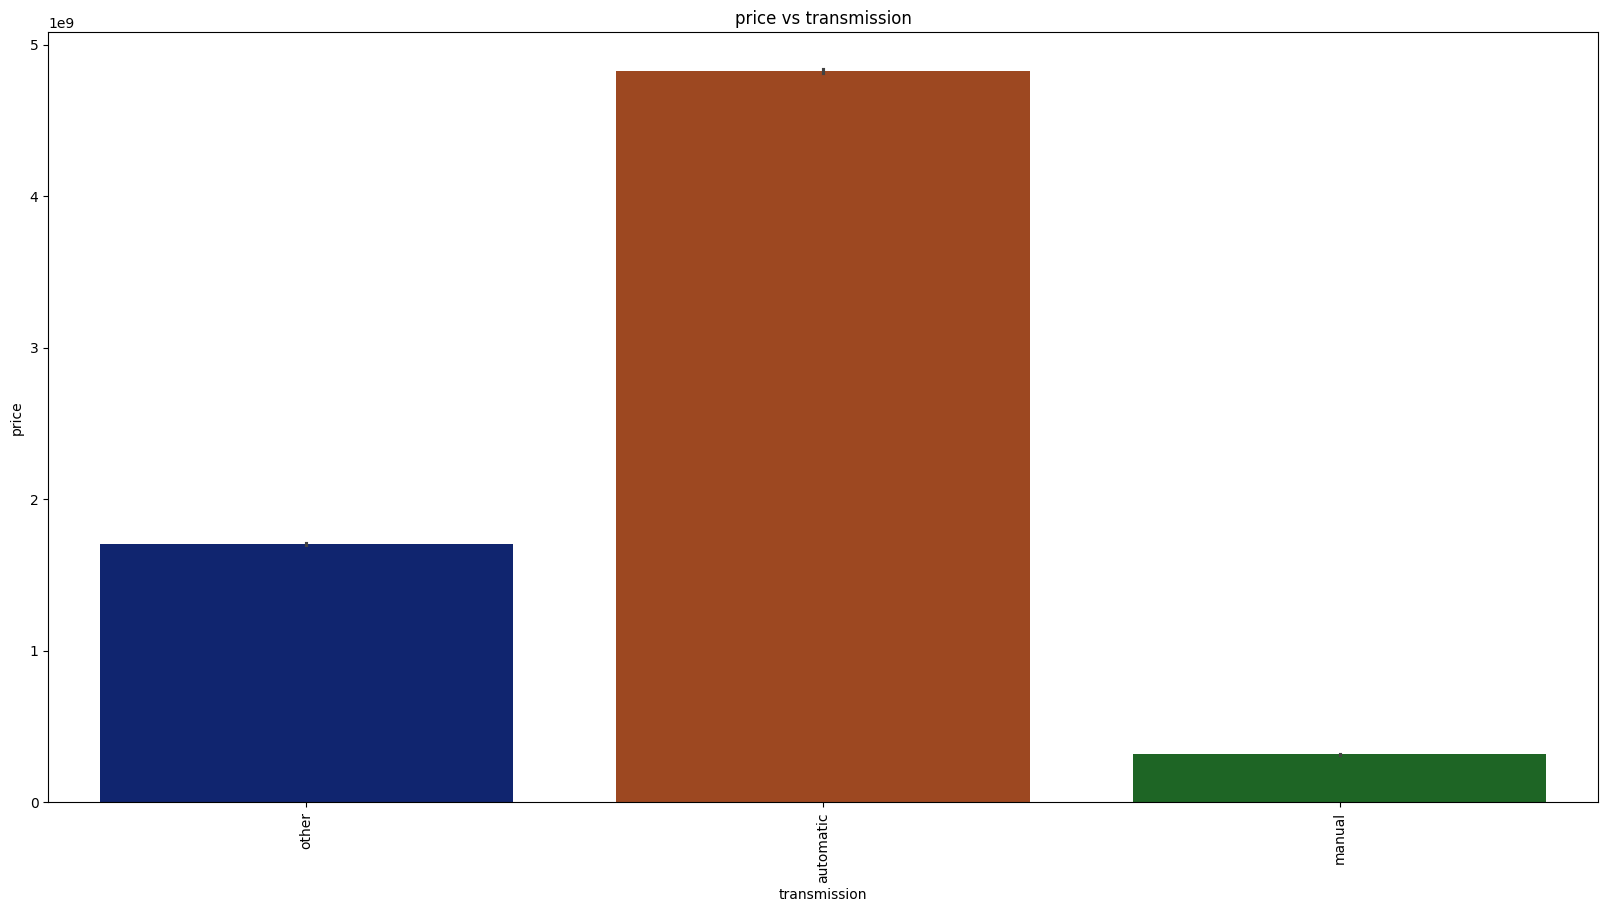

In [64]:
figure(figsize=(20,10))
sns.barplot(x=data["transmission"],y=data["price"],palette="dark",estimator=sum)
title("price vs transmission")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\218033482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["paint_color"],y=data["price"],palette="bright",estimator=sum)


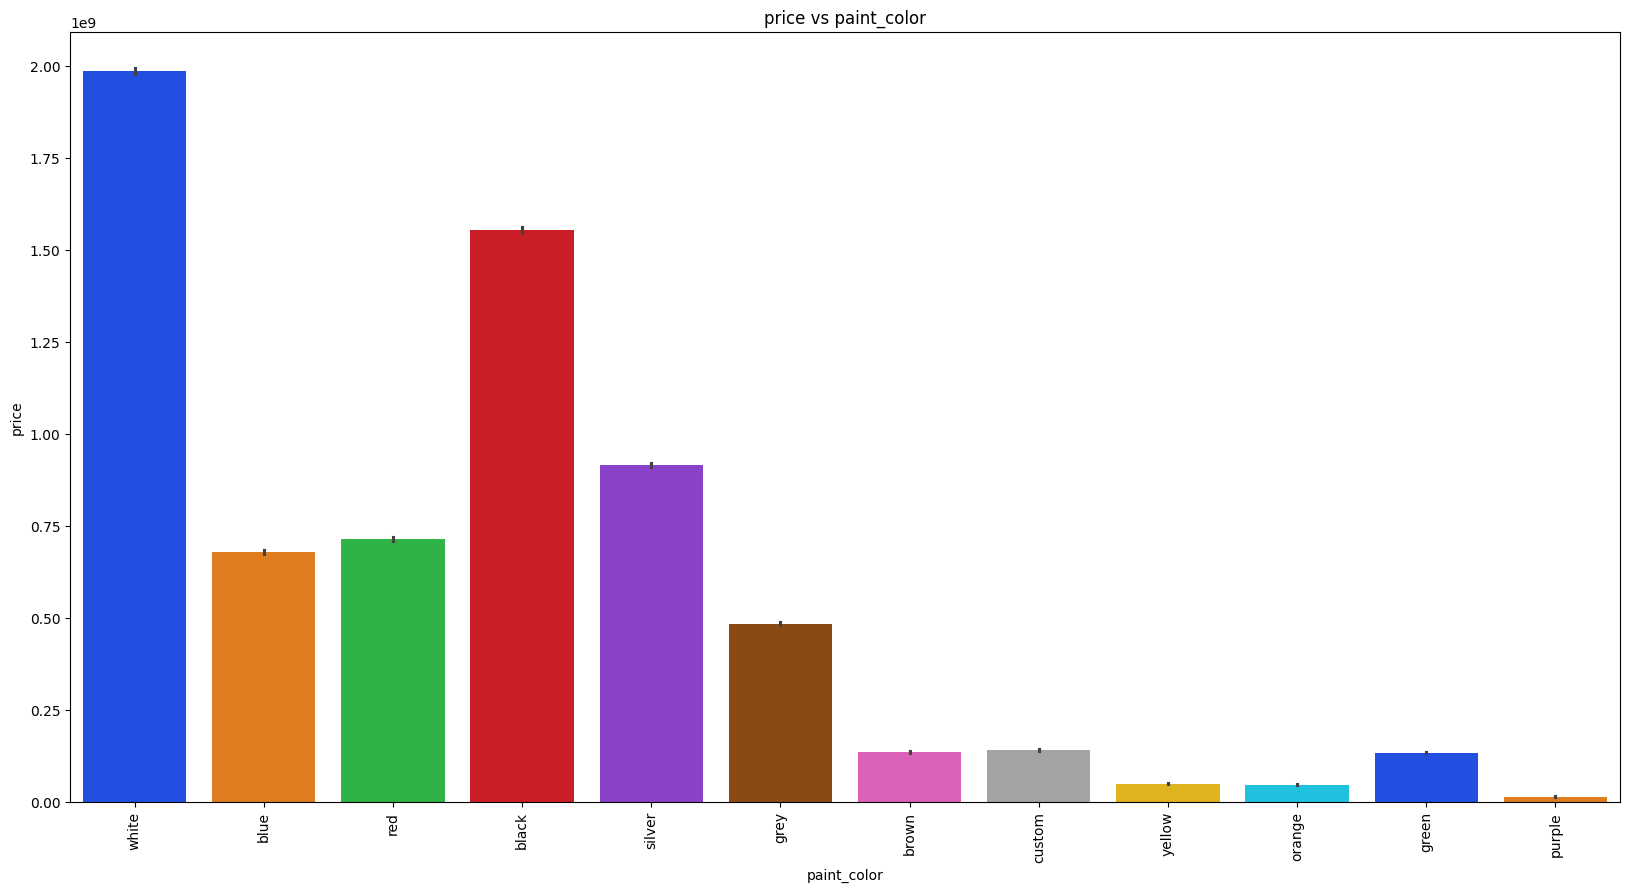

In [65]:
figure(figsize=(20,10))
sns.barplot(x=data["paint_color"],y=data["price"],palette="bright",estimator=sum)
title("price vs paint_color")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\3546965784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["size"],y=data["price"],palette="bright",estimator=sum)


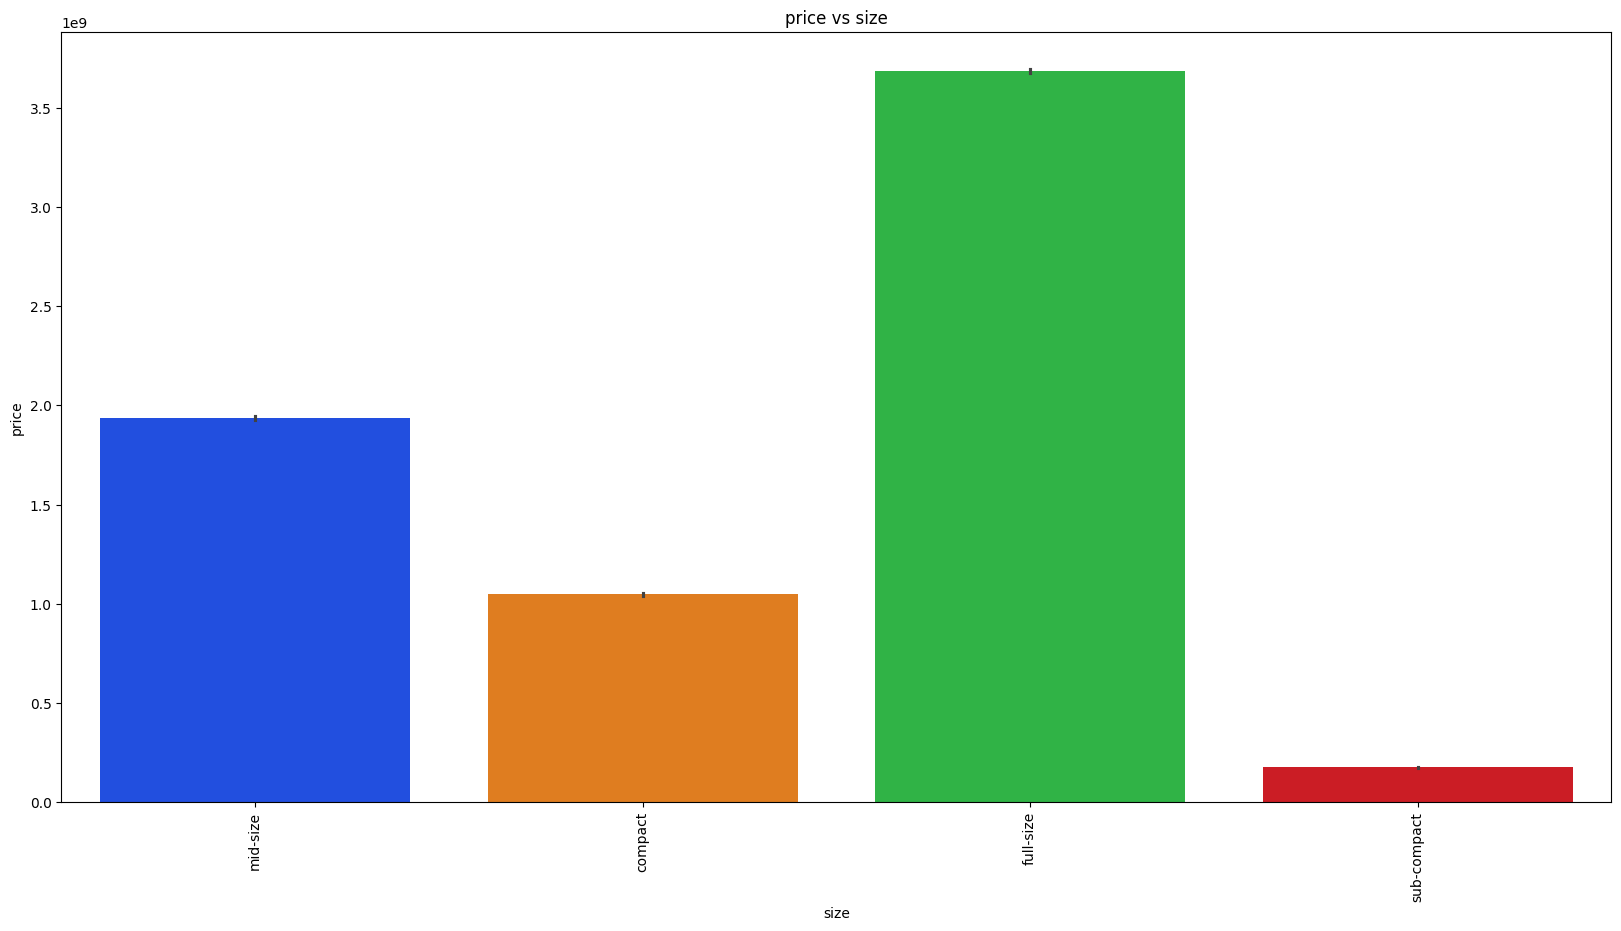

In [66]:
figure(figsize=(20,10))
sns.barplot(x=data["size"],y=data["price"],palette="bright",estimator=sum)
title("price vs size")
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\2980268138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["state"],y=data["price"],palette="dark",estimator=sum)


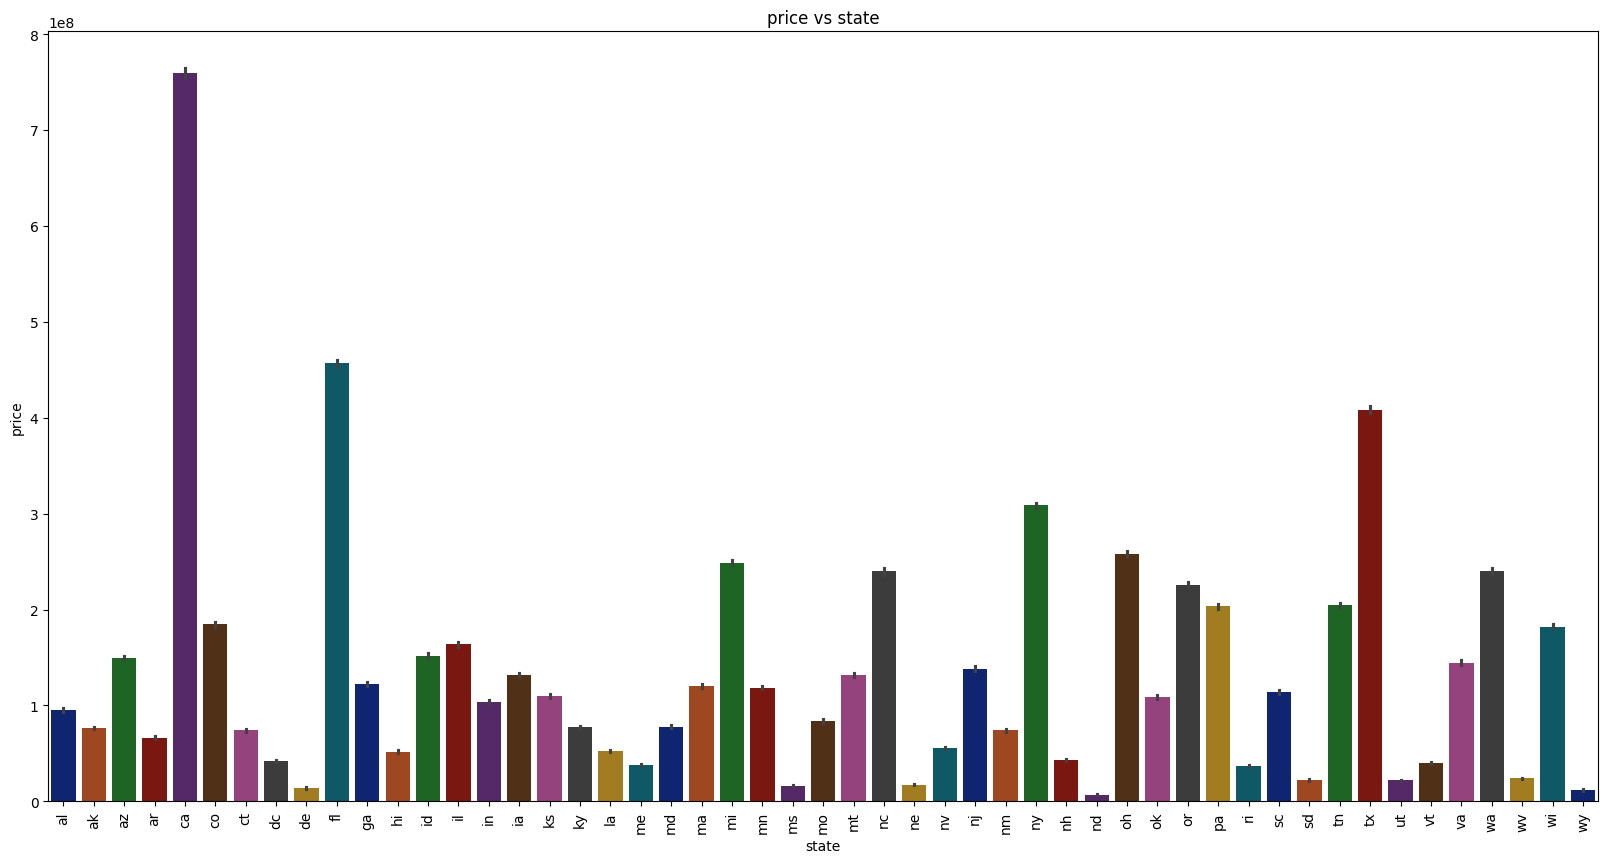

In [67]:
figure(figsize=(20,10))
sns.barplot(x=data["state"],y=data["price"],palette="dark",estimator=sum)
title("price vs state")
xticks(rotation=90)
show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401252 entries, 0 to 426852
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   region        401252 non-null  object        
 1   price         401252 non-null  int64         
 2   year          401252 non-null  int32         
 3   manufacturer  401252 non-null  object        
 4   model         401252 non-null  object        
 5   condition     401252 non-null  object        
 6   cylinders     401252 non-null  float64       
 7   odometer      401252 non-null  float64       
 8   title_status  401252 non-null  object        
 9   transmission  401252 non-null  object        
 10  drive         401252 non-null  object        
 11  size          401252 non-null  object        
 12  type          401252 non-null  object        
 13  paint_color   401252 non-null  object        
 14  state         401252 non-null  object        
 15  lat           401252 n

<class 'pandas.core.frame.DataFrame'>
Index: 401252 entries, 0 to 426852
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   region        401252 non-null  object        
 1   price         401252 non-null  int64         
 2   year          401252 non-null  int32         
 3   manufacturer  401252 non-null  object        
 4   model         401252 non-null  object        
 5   condition     401252 non-null  object        
 6   cylinders     401252 non-null  float64       
 7   odometer      401252 non-null  float64       
 8   title_status  401252 non-null  object        
 9   transmission  401252 non-null  object        
 10  drive         401252 non-null  object        
 11  size          401252 non-null  object        
 12  type          401252 non-null  object        
 13  paint_color   401252 non-null  object        
 14  state         401252 non-null  object        
 15  lat           401252 n

<h2> Data Preprocessing </h2>

In [71]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data):
    le = LabelEncoder()
    for col in data.columns:
        if data[col].dtypes == "object":
            data[col] = le.fit_transform(data[col]) 

label_encoder(data)


In [72]:
data.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,time
386783,375,7000,2006,14,22600,2,6.0,115000.0,0,0,0,1,10,0,46,42.962700,-72.295500,2021-05-03,35423
300275,206,6495,2005,39,24927,2,4.0,209000.0,0,1,0,2,10,9,35,40.811016,-82.976003,2021-05-04,29012
167758,297,17995,2014,10,11809,2,6.0,135106.0,0,0,0,1,0,10,16,39.029900,-96.839600,2021-04-20,37249
154198,288,39990,2019,31,2860,2,6.0,8373.0,0,2,2,1,3,10,15,39.820000,-84.880000,2021-04-28,67602
177532,315,41999,2014,13,14549,2,6.0,161533.0,0,0,1,2,8,0,18,30.649402,-97.865696,2021-04-14,7332
322820,275,192,2017,13,12939,2,4.0,95340.0,0,0,0,0,0,10,37,45.531885,-122.536959,2021-05-04,62788
221476,341,10150,1990,6,10887,3,8.0,31000.0,0,0,1,1,3,8,24,37.177361,-93.214977,2021-05-04,3270
132551,33,10995,2002,7,23601,2,6.0,345043.0,0,0,0,1,7,1,13,43.375908,-116.532219,2021-04-28,18529
139966,56,27300,2019,37,19994,0,4.0,44000.0,0,0,0,1,7,5,14,41.839700,-88.088700,2021-05-04,19423
18297,105,7950,1980,20,10214,0,6.0,65020.0,0,1,0,1,0,6,2,36.317500,-92.473600,2021-04-07,21296


In [73]:
data.drop(["posting_date","time"],inplace=True,axis=1)

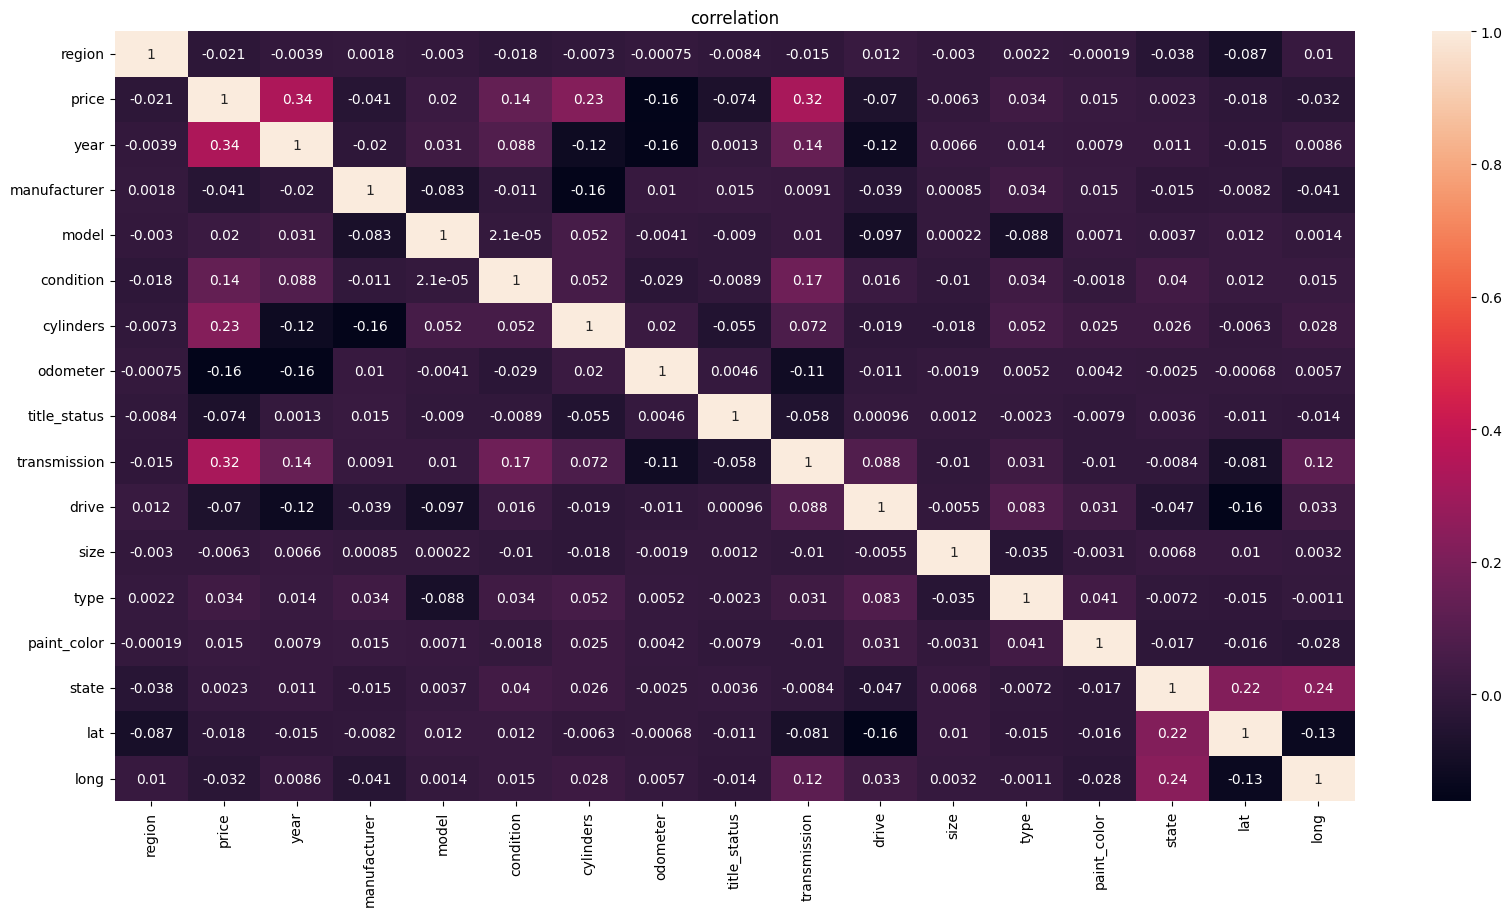

In [74]:
figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
title("correlation")
show()

In [75]:
from sklearn.model_selection import train_test_split

x = data.drop(["price"],axis=1)
y = data["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


<h2> Data Modeling </h2>

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

In [77]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lmedae = median_absolute_error(y_test,y_pred)
lmae = mean_absolute_error(y_test,y_pred)
lsme = mean_squared_error(y_test,y_pred)
lr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , lmedae)
print("mean absolute error is : " , lmae)
print("mean square error is : ",lsme)
print("r-squared is : " , lr2)

meadian absolute error is :  6744.449703060789
mean absolute error is :  8447.927640682847
mean square error is :  123244212.13117251
r-squared is :  0.2660985401434437


In [78]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

rfmedae = median_absolute_error(y_test,y_pred)
rfmae = mean_absolute_error(y_test,y_pred)
rfsme = mean_squared_error(y_test,y_pred)
rfr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , rfmedae)
print("mean absolute error is : " , rfmae)
print("mean square error is : ", rfsme)
print("r-squared is : " , rfr2)

meadian absolute error is :  1150.8499999999985
mean absolute error is :  2708.5510132286345
mean square error is :  25831516.504638027
r-squared is :  0.8461770549282652


In [79]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)

gbmedae = median_absolute_error(y_test,y_pred)
gbmae = mean_absolute_error(y_test,y_pred)
gbsme = mean_squared_error(y_test,y_pred)
gbr2 = r2_score(y_test,y_pred)

print("median absolute error is : " , gbmedae)
print("mean absolute error is : " , gbmae)
print("mean square error is : ", gbsme)
print("r-squared is : " , gbr2)

median absolute error is :  3751.4027086159977
mean absolute error is :  5862.281956332788
mean square error is :  72580269.485605
r-squared is :  0.5677949916579096


In [80]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)

xgbmedae = median_absolute_error(y_test,y_pred)
xgbmae = mean_absolute_error(y_test,y_pred)
xgbsme = mean_squared_error(y_test,y_pred)
xgbr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , xgbmedae)
print("mean absolute error is : " , xgbmae)
print("mean square error is : ", xgbsme)
print("r-squared is : " , xgbr2)

meadian absolute error is :  2535.1875
mean absolute error is :  4084.775726120672
mean square error is :  38723536.99210543
r-squared is :  0.7694069373491709


In [81]:
knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)

y_pred = knnr.predict(x_test)

knnmedae = median_absolute_error(y_test,y_pred)
knnmae = mean_absolute_error(y_test,y_pred)
knnsme = mean_squared_error(y_test,y_pred)
knnr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , knnmedae)
print("mean absolute error is : " , knnmae)
print("mean square error is : ", knnsme)
print("r-squared is : " , knnr2)    

meadian absolute error is :  2777.0
mean absolute error is :  5064.362181156621
mean square error is :  68080673.96940848
r-squared is :  0.5945894322324166


<h2> Models Evaluation</h2>

In [82]:
scores = {
    "median absolute error" :[ lmedae , xgbmedae , rfmedae , gbmedae , knnmedae ],
    "mean absolute error" : [ lmae , xgbmae , rfmae , gbmae , knnmae],
    "mean square error" : [ lsme , xgbsme , rfsme , gbsme , knnsme],
    "r-squared" : [ lr2 , xgbr2 , rfr2 , gbr2 , knnr2 ]
       }
indexes = [ "LinearRegression" , "XGBRegessor" , "RandomForestRegressor" , "GradientBoostingRegressor" , "KNeighborsRegressor"]
datascore = DataFrame(scores ,index= indexes)
datascore["r-squared"].astype("float64")
datascore["mean square error"].astype("float64")
datascore["mean absolute error"].astype("float64")
datascore["median absolute error"].astype("float64")
datascore.head(5)

,median absolute error,mean absolute error,mean square error,r-squared
LinearRegression,6744.449703,8447.927641,1.232442e+08,0.266099
XGBRegessor,2535.187500,4084.775726,3.872354e+07,0.769407
RandomForestRegressor,1150.850000,2708.551013,2.583152e+07,0.846177
GradientBoostingRegressor,3751.402709,5862.281956,7.258027e+07,0.567795
KNeighborsRegressor,2777.000000,5064.362181,6.808067e+07,0.594589


C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\387659135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["r-squared"],palette= "mako" )


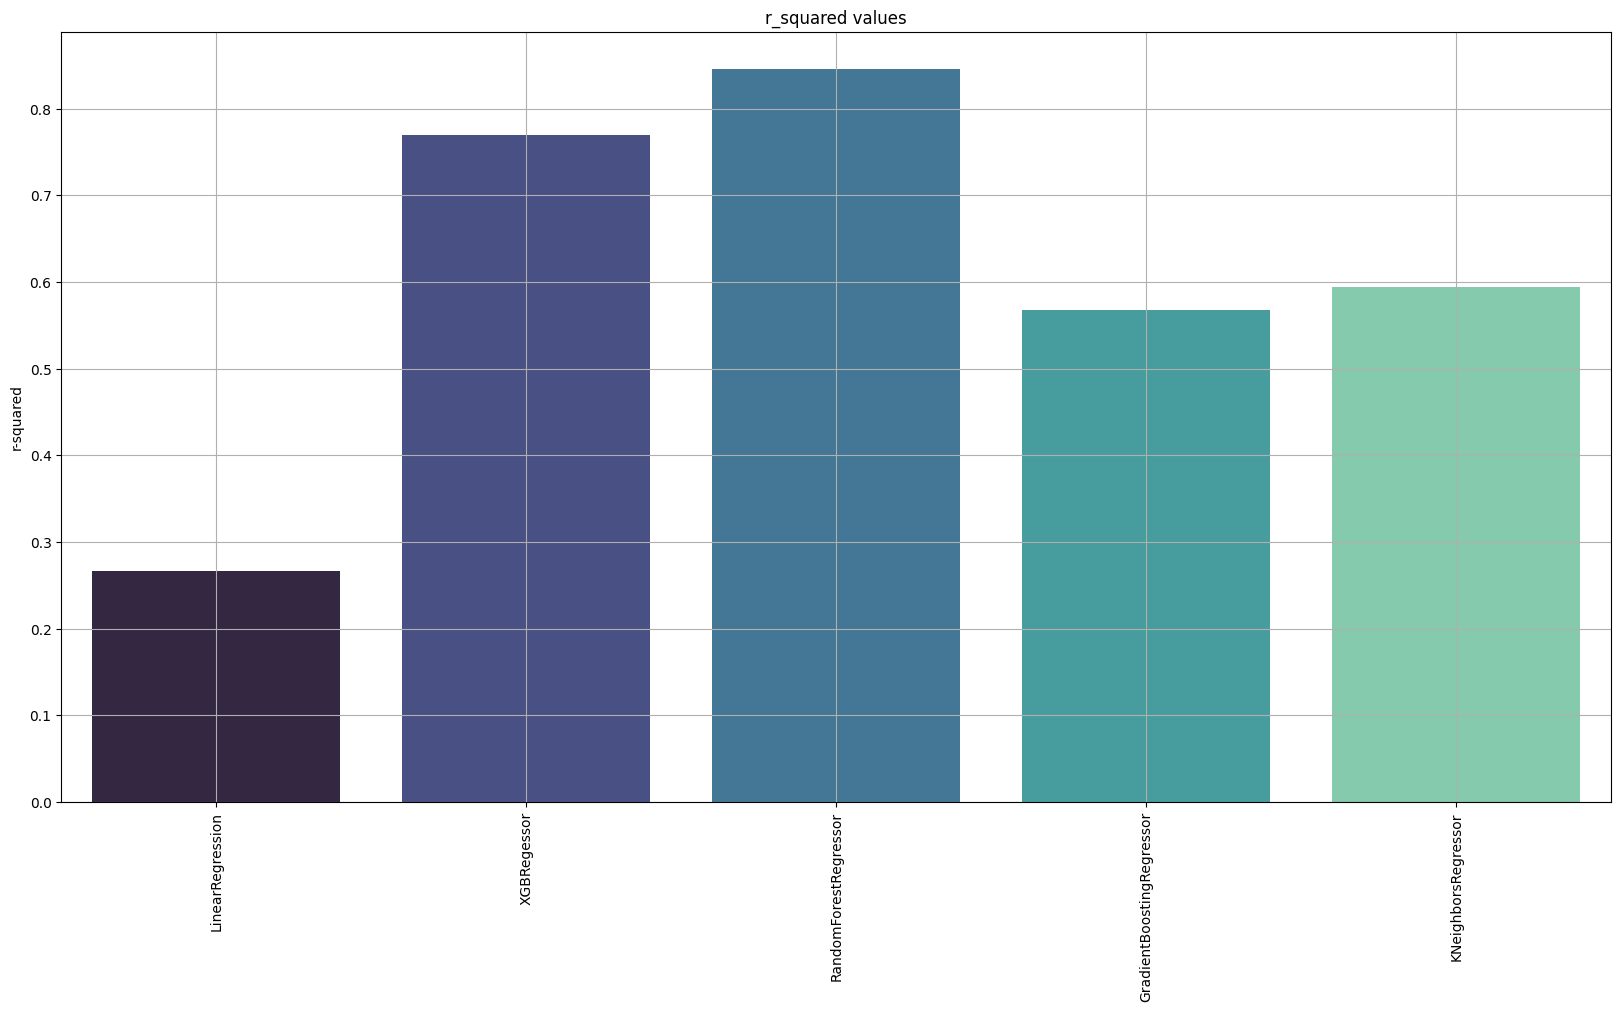

In [83]:
figure(figsize=(20,10))
sns.barplot( datascore["r-squared"],palette= "mako" )
title("r_squared values")
grid(True)
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15072\1776364678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["mean square error"] , palette= "deep" )


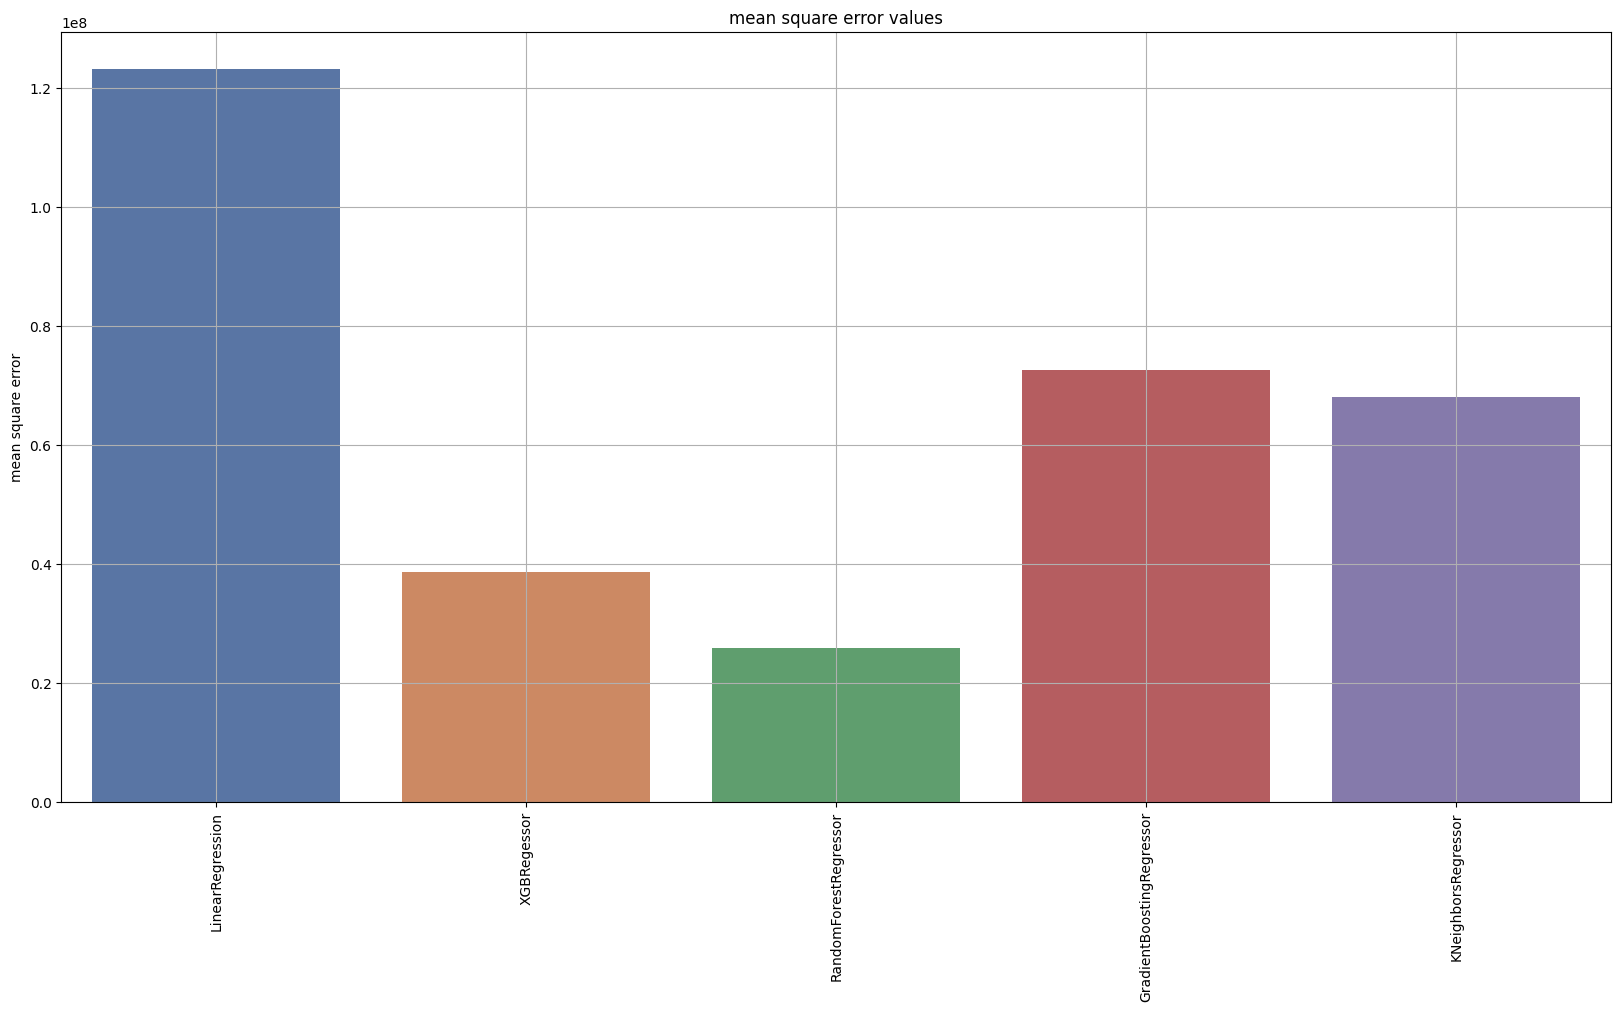

In [84]:
figure(figsize=(20,10))
sns.barplot( datascore["mean square error"] , palette= "deep" )
title("mean square error values")
grid(True)
xticks(rotation=90)
show()